In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



586

In [35]:
#Perform API Calls

In [36]:
# Create row to process down the list
row_counter = 1
# Create a dictionary with parameters using api
settings = {"appid": weather_api_key, "units": "imperial"}
# Call the input URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# Create query url
query_url = f"{base_url}appid={settings['appid']}&units={settings['units']}&q="

In [37]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
print("Beginning Data Retrieval\n------------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | bluff
City not found. Skipping...
Processing Record 4 of Set 1 | tiznit
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | karratha
Processing Record 10 of Set 1 | sola
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | beringovskiy
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | atuona
City not found. Skipping...
Processing Record 18 of Set 1 | dubbo
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | gornopravdinsk
Processing Record 21 of Set 1 | busselton
City not found. Skipping...
Ci

Processing Record 40 of Set 4 | gazli
Processing Record 41 of Set 4 | krasnoselkup
Processing Record 42 of Set 4 | savinka
Processing Record 43 of Set 4 | axim
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | ishigaki
Processing Record 46 of Set 4 | ojinaga
Processing Record 47 of Set 4 | rudnogorsk
Processing Record 48 of Set 4 | kudahuvadhoo
Processing Record 49 of Set 4 | bilibino
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 5 | bethel
Processing Record 2 of Set 5 | ngunguru
Processing Record 3 of Set 5 | abha
Processing Record 4 of Set 5 | husavik
Processing Record 5 of Set 5 | sioux lookout
Processing Record 6 of Set 5 | maputo
Processing Record 7 of Set 5 | yabelo
Processing Record 8 of Set 5 | xingcheng
Processing Record 9 of Set 5 | yarmouth
Processing Record 10 of Set 5 | mbuji-mayi
Processing Record 11 of Set 5 | cherskiy
Processing Record 12 of Set 5 | port hawkesbury
Processing Record 13 of Set 5 | benghazi
Processi

Processing Record 33 of Set 8 | penzance
Processing Record 34 of Set 8 | vikhorevka
Processing Record 35 of Set 8 | tarauaca
City not found. Skipping...
Processing Record 36 of Set 8 | kamyshevatskaya
Processing Record 37 of Set 8 | salalah
Processing Record 38 of Set 8 | lensk
Processing Record 39 of Set 8 | rio gallegos
Processing Record 40 of Set 8 | batticaloa
Processing Record 41 of Set 8 | zelenoborsk
Processing Record 42 of Set 8 | aragarcas
Processing Record 43 of Set 8 | phan thiet
Processing Record 44 of Set 8 | nizwa
Processing Record 45 of Set 8 | batagay-alyta
Processing Record 46 of Set 8 | padang
Processing Record 47 of Set 8 | christchurch
Processing Record 48 of Set 8 | sinegorye
City not found. Skipping...
Processing Record 49 of Set 8 | manhush
Processing Record 1 of Set 9 | hurghada
Processing Record 2 of Set 9 | katsuura
Processing Record 3 of Set 9 | adrar
Processing Record 4 of Set 9 | meadow lake
Processing Record 5 of Set 9 | boca do acre
Processing Record 6 of

In [38]:
#Convert Raw Data to DataFrame

#Export the city data into a .csv.
#Display the DataFrame

In [39]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

weather_dataframe.count()

City          525
Cloudiness    525
Country       525
Date          525
Humidity      525
Lat           525
Lng           525
Max Temp      525
Wind Speed    525
dtype: int64

In [40]:
output_data_file = "Output_Data/cities.csv"
weather_dataframe

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hobart,75,AU,1603497192,54,-42.88,147.33,60.01,9.17
1,anadyr,75,RU,1603497356,100,64.75,177.48,23.00,4.47
2,bluff,95,NZ,1603497356,51,-46.60,168.33,71.01,15.01
3,tiznit,62,MA,1603497356,69,29.58,-9.50,62.10,0.87
4,cape town,2,CL,1603497356,44,-36.41,-71.90,60.80,11.41
...,...,...,...,...,...,...,...,...,...
520,podosinovets,100,RU,1603497436,97,60.28,47.07,37.65,7.25
521,yar-sale,90,RU,1603497436,95,66.83,70.83,20.97,8.72
522,shubarkuduk,100,KZ,1603497437,76,49.14,56.49,38.37,18.14
523,sandpoint,90,US,1603497437,92,48.28,-116.55,33.01,5.82


In [41]:
 #Plotting the Data

#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

 #Latitude vs. Temperature Plot

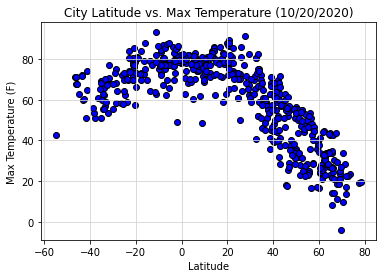

In [42]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (10/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

In [43]:
#Latitude vs. Humidity Plot

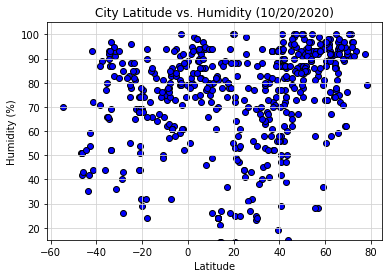

In [44]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (10/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

In [45]:
#Latitude vs. Cloudiness Plot

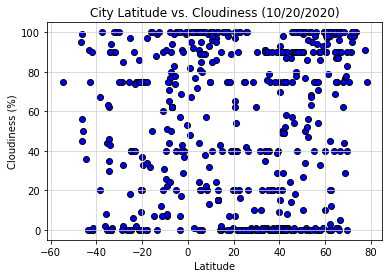

In [46]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (10/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

In [47]:
 #Latitude vs. Wind Speed Plot

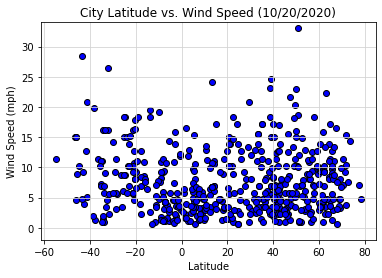

In [48]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (10/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Wind Speed.png")
plt.show()

In [49]:
#Linear Regression

In [61]:
northern = weather_dataframe.loc[weather_dataframe["Lat"]>0.01]
southern = weather_dataframe.loc[weather_dataframe["Lat"]<-0.01]

# northern_hemisphere.head()
southern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hobart,75,AU,1603497192,54,-42.88,147.33,60.01,9.17
2,bluff,95,NZ,1603497356,51,-46.60,168.33,71.01,15.01
4,cape town,2,CL,1603497356,44,-36.41,-71.90,60.80,11.41
6,carnarvon,0,AU,1603497357,78,-24.87,113.63,71.60,18.34
7,castro,40,BR,1603497357,96,-24.79,-50.01,62.37,8.81


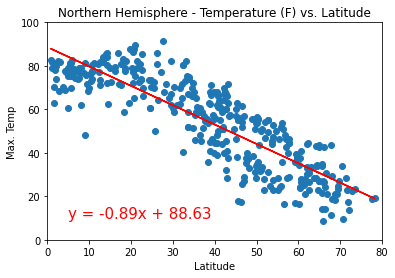

In [63]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH MAX TEMP VS LAT.png")

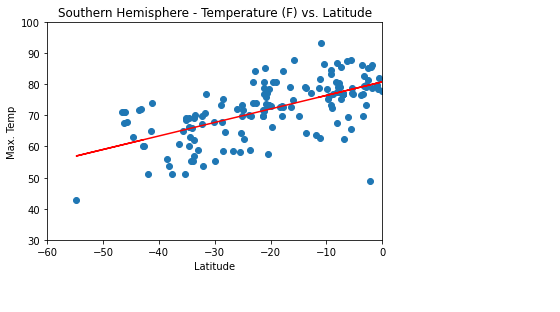

In [64]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH MAX TEMP VS LAT.png")

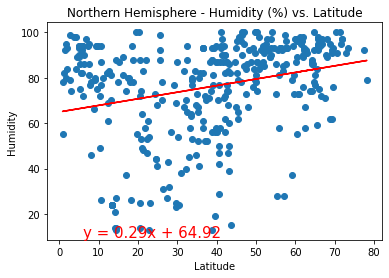

In [65]:
 x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH HUM VS LAT.png")

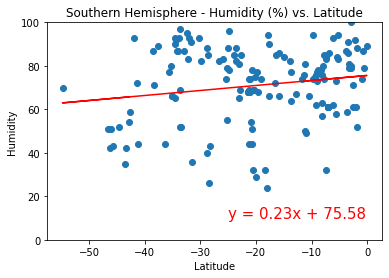

In [66]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH HUM VS LAT.png")

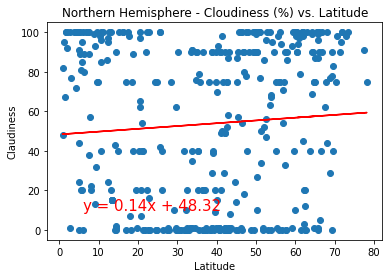

In [76]:
 x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.ylabel("Claudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH CLOUD VS LAT.png")

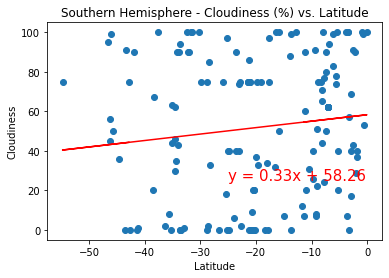

In [77]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH CLOUD VS LAT.png")



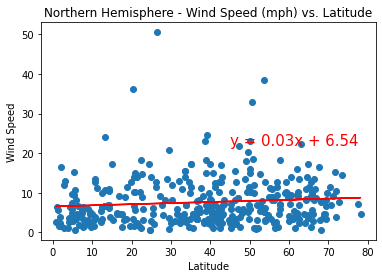

In [78]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH WIND VS LAT.png")

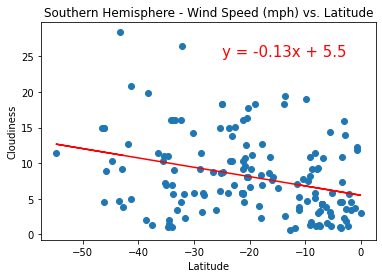

In [79]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH WIND VS LAT.png")


In [81]:
weather_dataframe.head(500)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hobart,75,AU,1603497192,54,-42.88,147.33,60.01,9.17
1,anadyr,75,RU,1603497356,100,64.75,177.48,23.00,4.47
2,bluff,95,NZ,1603497356,51,-46.60,168.33,71.01,15.01
3,tiznit,62,MA,1603497356,69,29.58,-9.50,62.10,0.87
4,cape town,2,CL,1603497356,44,-36.41,-71.90,60.80,11.41
...,...,...,...,...,...,...,...,...,...
495,buraydah,0,SA,1603497433,31,26.33,43.98,64.40,50.55
496,hobyo,100,SO,1603497352,75,5.35,48.53,81.52,15.30
497,pyapon,100,MM,1603497433,89,16.28,95.68,77.58,4.76
498,kapit,100,MY,1603497433,93,2.02,112.93,74.12,1.66


In [82]:
weather_dataframe.to_csv("weather.csv")